# Example implementations for random variable characterizations

JDodson, 2021-10-18, Julia 1.6

In [1]:
using SpecialFunctions, QuadGK

In [2]:
using Gadfly # for plots

# Normal random variable

In [4]:
"standard Normal density"
function Normal_dens(x)
    return exp(x^2/-2)/sqrt(2π)
end

Normal_dens

In [5]:
"standard Normal distribution"
function Normal_dist(x)
    return erfc(x/-sqrt(2))/2
end

Normal_dist

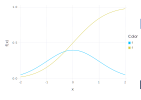

In [6]:
plot([Normal_dens,Normal_dist],-2,2)

In [7]:
"standard Normal quantile"
function Normal_quan(p)
    return -sqrt(2)erfcinv(2p)
end

Normal_quan

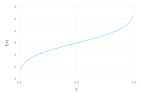

In [8]:
plot(Normal_quan,0.01,0.99)

In [9]:
@time norm_samp = Normal_quan.(rand(10000));

  0.000272 seconds (15 allocations: 175.969 KiB)


In [10]:
@time norm_samp2 = randn(10000);

  0.000054 seconds (2 allocations: 78.203 KiB)


# symmetric Normal / reciprocal inverse Gaussian (NRIG) random variable

In [11]:
"standard NRIG density"
function NRIG_dens(x,g)
    return exp(g)sqrt(1+g)besselk(0,sqrt(g^2+(1+g)*x^2))/π
end

NRIG_dens

In [12]:
"standard NRIG distribution"
function NRIG_dist(x,g)
    return 1/2+quadgk(z->NRIG_dens(z,g),0,x)[1]
end

NRIG_dist

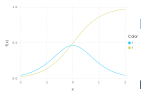

In [13]:
plot([x->NRIG_dens(x,2),x->NRIG_dist(x,2)],-2,2)

In [14]:
"standard NRIG quantile"
function NRIG_quan(p,g)
# Newton-Raphson method to invert NRIG_dist
    x₀ = Normal_quan(p) # initial guess
    x₁ = NaN
    for n = 1:20
        f₀ = NRIG_dens(x₀,g)
        x₁ = x₀-(1/2-p+quadgk(x->NRIG_dens(x,g),0,x₀)[1])/f₀
        if abs(x₁-x₀) < 1.E-12
            break
        end
        x₀ = x₁
    end
    return x₁
end

NRIG_quan

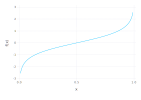

In [15]:
plot(p->NRIG_quan(p,2),0.01,0.99)

In [16]:
@time NRIG_samp = NRIG_quan.(rand(10000),2);

  0.600101 seconds (1.32 M allocations: 23.522 MiB)


# Student's-*t*<sub>4</sub> random variable

In [17]:
"conventional Student's-t₄ density"
function t4_dens(x)
    return 3/8*(1+x^2/4)^(-5/2)
end

t4_dens

In [18]:
"conventional Student's-t₄ distribution"
function t4_dist(x)
    return (1+(x*(6+x^2))/((4+x^2)^(3/2)))/2
end

t4_dist

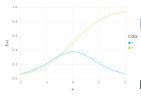

In [19]:
plot([t4_dens,t4_dist],-2,2)

In [20]:
"conventional Student's-t₄ quantile"
function t4_quan(p)
    a=1/(4p*(1-p))
    return 2sign(p-1/2)sqrt(sqrt(a)cos(atan(sqrt(a-1))/3)-1)
end

t4_quan

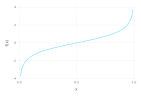

In [21]:
plot(t4_quan,0.01,0.99)

In [22]:
@time t4_samp = t4_quan.(rand(10000));

  0.000448 seconds (4 allocations: 156.406 KiB)


In [23]:
@time t4_samp2 = randn(10000)./sqrt.(sum(randn(10000,4).^2,dims=2)/4);

  0.000401 seconds (16 allocations: 938.047 KiB)
